<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/decision_tree_and_svm(task5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/test.csv')

Mounted at /content/drive


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
print(df.isnull().sum())


id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [ ]:
print(df.describe())

                id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min

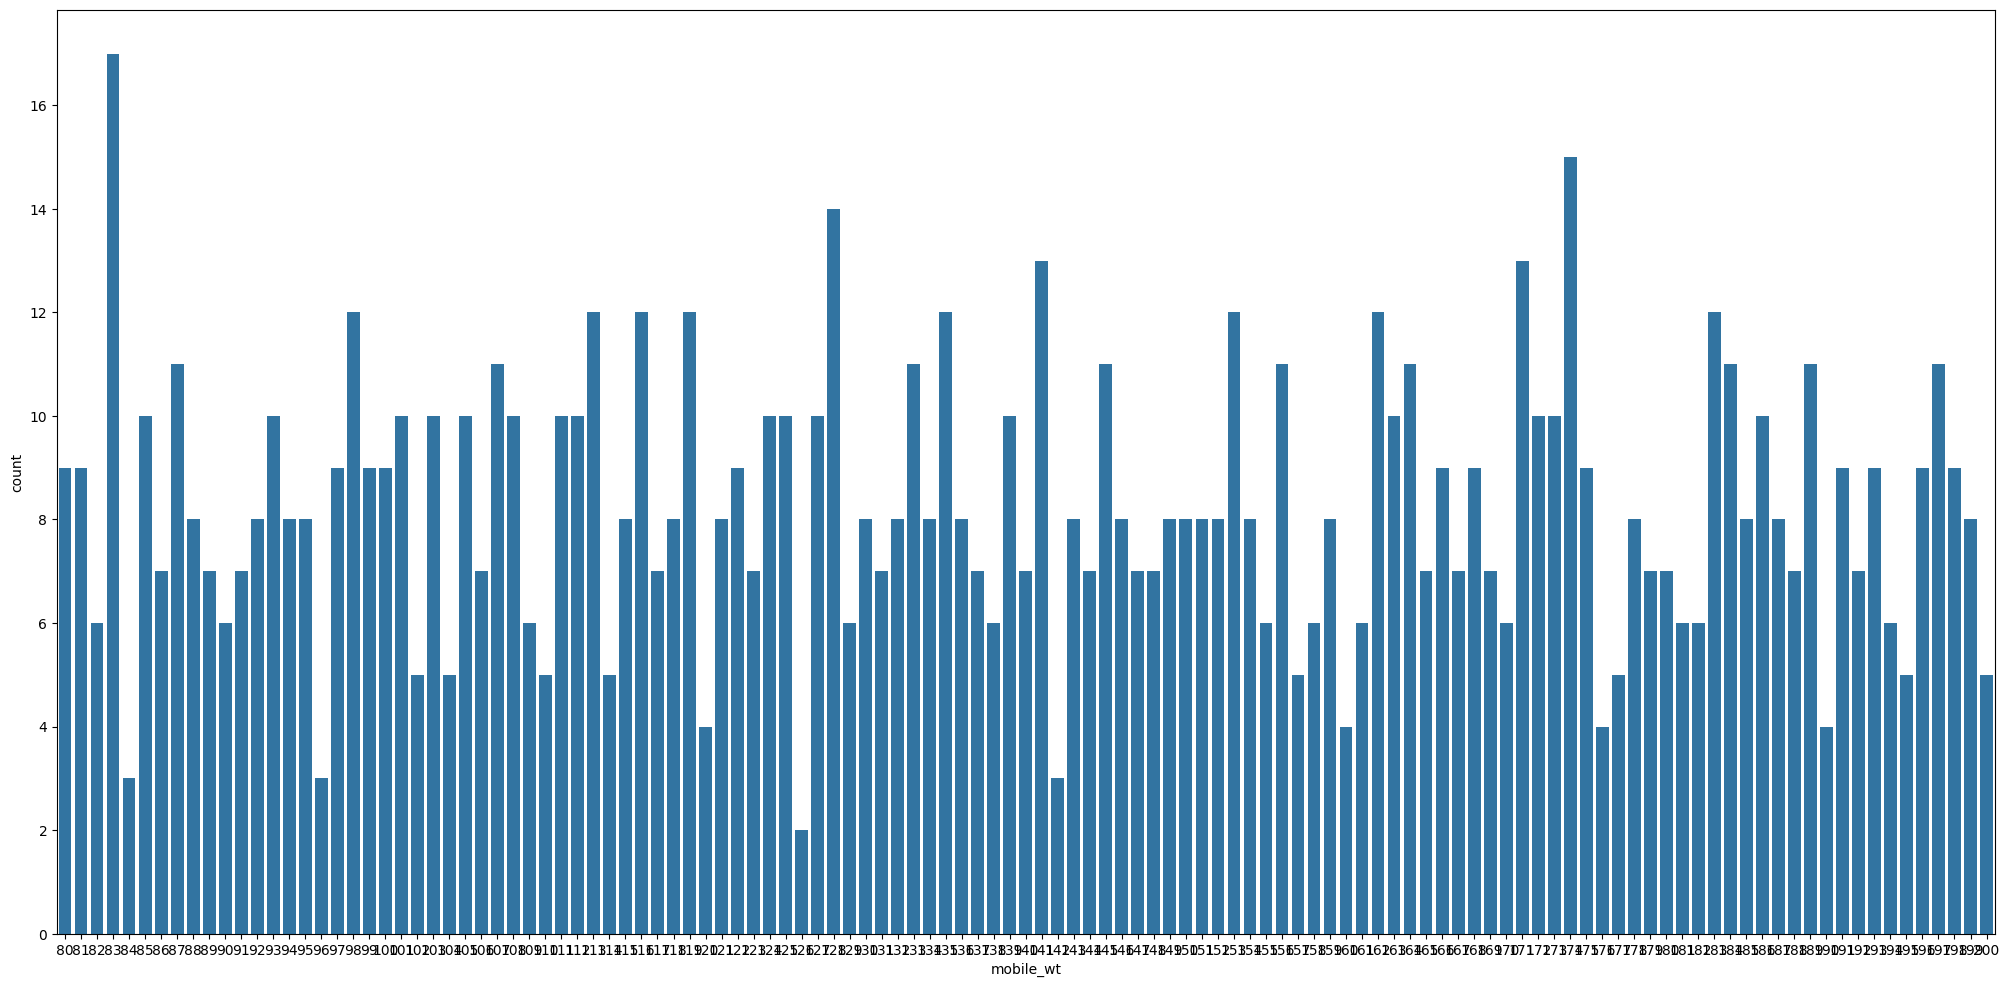

In [ ]:
# Visualize the distribution of the mobile_wt (assuming it's binary classification)
plt.figure(figsize=(25,12))
sns.countplot(x='mobile_wt', data=df)
plt.show()


Text(0.5, 1.0, 'talk_time')

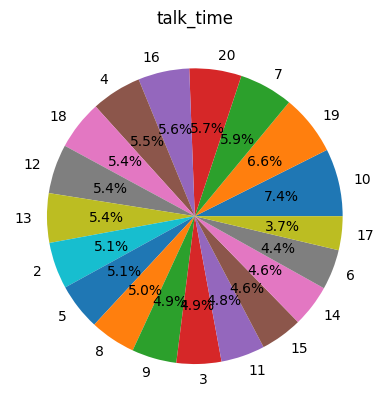

In [ ]:
# Pie chart using matplotlib
dependents = df['talk_time'].value_counts()
plt.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%')
plt.title("talk_time")


**DECISION TREE**

A decision tree is a hierarchical model used in decision support that depicts decisions and their potential outcomes, incorporating chance events, resource expenses, and utility. This algorithmic model utilizes conditional control statements and is non-parametric, supervised learning, useful for both classification and regression tasks.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assume 'target_variable' is the name of your target column
X = df.drop('touch_screen', axis=1)
y = df['touch_screen']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.515


[Text(0.5769230769230769, 0.875, 'x[0] <= 962.5\nentropy = 1.0\nsamples = 800\nvalue = [403, 397]'),
 Text(0.3076923076923077, 0.625, 'x[14] <= 2591.0\nentropy = 0.999\nsamples = 771\nvalue = [396, 375]'),
 Text(0.15384615384615385, 0.375, 'x[14] <= 1709.5\nentropy = 0.999\nsamples = 462\nvalue = [221, 241]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.996\nsamples = 291\nvalue = [156, 135]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.958\nsamples = 171\nvalue = [65, 106]'),
 Text(0.46153846153846156, 0.375, 'x[16] <= 15.5\nentropy = 0.987\nsamples = 309\nvalue = [175, 134]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.991\nsamples = 301\nvalue = [167, 134]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.8461538461538461, 0.625, 'x[5] <= 6.5\nentropy = 0.797\nsamples = 29\nvalue = [7, 22]'),
 Text(0.7692307692307693, 0.375, 'x[1] <= 1090.0\nentropy = 0.977\nsamples = 17\nvalue = [7, 10]'),
 Text(0.6923076923076923, 0.125, 'entropy

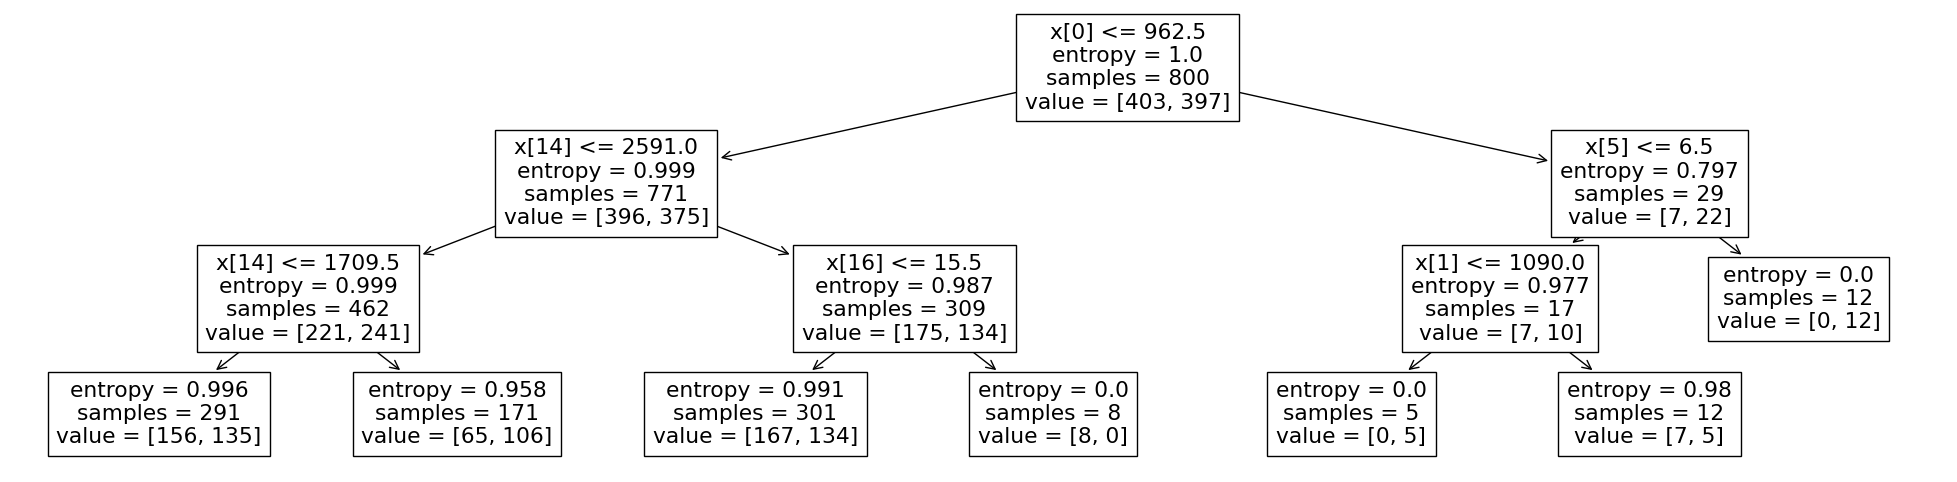

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

plt.figure(figsize=(25, 6))
tree.plot_tree(clf_en.fit(X_train, y_train))

**SVM**

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective in high-dimensional spaces and is well-suited for both linear and non-linear data.

The primary goal of SVM is to find a hyperplane in the input space that best separates the data points of different classes while maximizing the margin between the classes

In [ ]:
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Accuracy: 0.5


In [ ]:
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.48      0.39      0.43        97
           1       0.51      0.60      0.55       103

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.49       200

